In [44]:
import os, shutil, sys, random, cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import seaborn as sns

In [3]:
dataset_folder = '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/'
dataset_dividido_folder = '../input/brainmriimagesforbraintumordetection/brain_tumor_dataset_dividido/'
treino_folder = 'treino/'
validacao_folder = 'validacao/'
teste_folder = 'teste/'

yes = 'yes'
no = 'no'

if not os.path.isdir(dataset_dividido_folder):
  os.mkdir(dataset_dividido_folder)

if not os.path.isdir(dataset_dividido_folder + treino_folder):
  os.mkdir(dataset_dividido_folder + treino_folder)
  os.mkdir(dataset_dividido_folder + treino_folder + yes)
  os.mkdir(dataset_dividido_folder + treino_folder + no)

if not os.path.isdir(dataset_dividido_folder + validacao_folder):
  os.mkdir(dataset_dividido_folder + validacao_folder)
  os.mkdir(dataset_dividido_folder + validacao_folder + yes)
  os.mkdir(dataset_dividido_folder + validacao_folder + no)

if not os.path.isdir(dataset_dividido_folder + teste_folder):
  os.mkdir(dataset_dividido_folder + teste_folder)
  os.mkdir(dataset_dividido_folder + teste_folder + yes)
  os.mkdir(dataset_dividido_folder + teste_folder + no)

In [ ]:
numb = []
for pasta in os.listdir(dataset_folder):
    if not pasta.startswith('.'):
        IMG_NUM = len(os.listdir(dataset_folder + pasta))
        for (n, FILE_NAME) in enumerate(os.listdir(dataset_folder + pasta)):
            img = dataset_folder + pasta + '/' + FILE_NAME
            if n < 0.2 * IMG_NUM:
                numb.append(n)
                shutil.copy(img, dataset_dividido_folder + teste_folder + pasta + '/' + FILE_NAME) 
            elif n < 0.7 * IMG_NUM and n not in numb:
                shutil.copy(img, dataset_dividido_folder + treino_folder + pasta + '/' + FILE_NAME) 
            else:
                shutil.copy(img, dataset_dividido_folder + validacao_folder + pasta + '/' + FILE_NAME) 

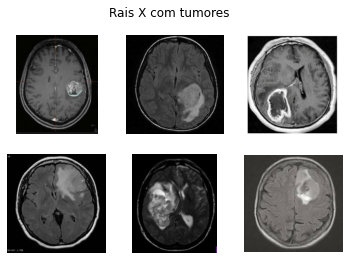

In [40]:
path = os.listdir(dataset_dividido_folder + treino_folder + yes)
sample = random.sample(path,6)
f,ax = plt.subplots(2,3) 
for i in range(0,6):
    img = cv2.imread(dataset_dividido_folder+'/treino/yes/'+sample[i])
    ax[i//3,i%3].imshow(img)
    ax[i//3,i%3].axis('off')
f.suptitle('Rais X com tumores')
plt.show()

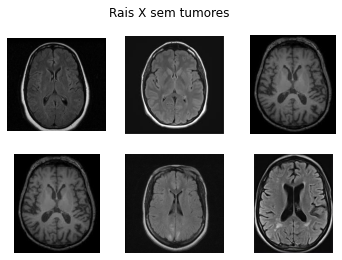

In [39]:
path = os.listdir(dataset_dividido_folder + treino_folder + no)
sample = random.sample(path,6)
f,ax = plt.subplots(2,3) 
for i in range(0,6):
    img = cv2.imread(dataset_dividido_folder+'/treino/no/'+sample[i])
    ax[i//3,i%3].imshow(img)
    ax[i//3,i%3].axis('off')
f.suptitle('Rais X sem tumores')
plt.show()

AttributeError: 'tuple' object has no attribute 'bar'

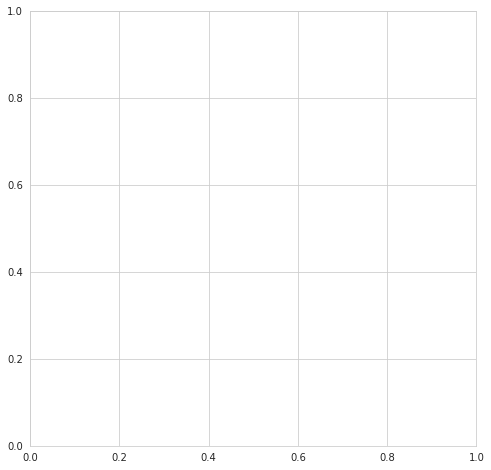

In [58]:
treino_dir_yes = dataset_dividido_folder + treino_folder + yes
treino_dir_no = dataset_dividido_folder + treino_folder + no
teste_dir_yes = dataset_dividido_folder + teste_folder + yes
teste_dir_no = dataset_dividido_folder + teste_folder + no
validacao_dir_yes = dataset_dividido_folder + validacao_folder + yes
validacao_dir_no = dataset_dividido_folder + validacao_folder + no
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('whitegrid')
grafico = sns.barplot(ax = ax, x=['Treino-yes','Treino-no','Teste-yes','Teste-no','Validation-yes','Validation-no'],
                      y=[len(treino_dir_yes),len(treino_dir_no),len(teste_dir_yes),len(teste_dir_no),len(validacao_dir_yes),len(validacao_dir_no)])
grafico.set_title('Dados Dataset')
plt.show()

In [ ]:
#Redimensionar imagens
treino_gen = ImageDataGenerator(rescale = 1./255)
teste_gen = ImageDataGenerator(rescale = 1./255)
validacao_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
treino_dir = dataset_dividido_folder + treino_folder
teste_dir = dataset_dividido_folder + teste_folder
validacao_dir = dataset_dividido_folder + validacao_folder
#Aplicar a redimensão aos dados treino, teste e validação
dados_treino = treino_gen.flow_from_directory(
    treino_dir,
    target_size = (150,150),
    batch_size = 30,
    class_mode = 'binary'
    )
dados_teste = teste_gen.flow_from_directory(
    teste_dir,
    target_size = (150,150),
    batch_size = 30,
    class_mode = 'binary'
    )
dados_validacao = validacao_gen.flow_from_directory(
    validacao_dir,
    target_size = (150,150),
    batch_size = 30,
    class_mode = 'binary'
    )

In [ ]:
#Ver os shapes
print("Shape das labels dos dados de treino", dados_treino.__getitem__(0)[1].shape)
print("Shape dos atributos dos dados de teste",dados_teste.__getitem__(0)[0].shape)
print("Shape das labels dos dados de teste",dados_teste.__getitem__(0)[1].shape)
print("Shape dos atributos dos dados de validação",dados_validacao.__getitem__(0)[0].shape)
print("Shape das labels dos dados de validação",dados_validacao.__getitem__(0)[1].shape)

In [ ]:
#Criar o modelo com CNNs
model = Sequential()
model.add(Conv2D(60,(3,3), input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
#Efetuar o fit ao modelo
history = model.fit(dados_treino, steps_per_epoch = 5, epochs = 20, validation_data = dados_validacao, verbose = 1)

In [ ]:
#Avaliar o modelo
scores = model.evaluate_generator(dados_teste, verbose = 1)
print("Accuracy do modelo: ", scores[1] * 100)

In [ ]:
#Visualizar gráficos
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

#Gráfico Accuracy
plt.plot(epochs, accuracy, 'b', color = 'green', label = 'Accuracy Treino')
plt.plot(epochs, val_accuracy, 'b', label = 'Accuracy Teste')
plt.title('Accuracy do treino e do teste')
plt.legend()
plt.figure()

#Gráfico Loss
plt.plot(epochs, loss, 'b', color = 'green', label = 'Loss Treino')
plt.plot(epochs, val_loss, 'b', label = 'Loss Teste')
plt.title('Loss do treino e do teste')
plt.legend()
plt.show()

In [ ]:
def visualize_previsao(img, img_class):
    print("X:",img.shape)
    print("y:",img_class.shape)
    plt.imshow(img, cmap='gray')
    plt.show()
    print("label:",img_class)
    print("antes do aumento de mais uma dimensão:",img.shape)
    imagem_tensor = np.expand_dims(img, axis=0)
    print("depois do aumento de mais uma dimensão:",imagem_tensor.shape)
    print("previsão:",model.predict(imagem_tensor))
    classes = model.predict_classes(imagem_tensor)
    print('Classe prevista:',classes)
    return imagem_tensor
#dados_teste.__getitem__(0)[0], o primeiro 0 é a bacth dos dados, neste caso como dados_teste tem 52 imagens, uma bacth size de 10 vamos ter 6 batchs, podendo este número ir até 5
# O segundo 0 é se queremos os atributos ou as labels (1)
#dados_teste.__getitem__(0)[0][1] vamos buscar na bacth 0 os atributos da imagem 1 

imagem_tensor = visualize_previsao(dados_teste.__getitem__(0)[0][1], dados_teste.__getitem__(0)[1][1])

In [ ]:
camadas_outputs = []
for layer in model.layers[:3]:
    print(layer.output.shape)
    camadas_outputs.append(layer.output)

# e depois criamos um modelo que retorna estes outputs dado os inputs do modelo
activation_model = Model(inputs=model.input, outputs=camadas_outputs) 
activations = activation_model.predict(imagem_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.imshow(first_layer_activation[0, :, :, 9], cmap='viridis')
plt.show()

In [ ]:
nome_camadas = []
for camada in model.layers[:3]:
    print("Nome da camada: ", camada.name)
    nome_camadas.append(camada.name)

imagens_por_linha = 20 

for nome_camada, ativacao_camada in zip(nome_camadas, activations): # o zip permite iterar simultaneamente em 2 listas
    n_features = ativacao_camada.shape[-1] # Numero de features no feature map, pois é o que está na ultima dimensão
    size = ativacao_camada.shape[1] #O feature map tem shape (1, tamanho, tamanho, numero_features).
    n_linhas = -(-n_features // imagens_por_linha) # Empilha os canais de ativação nesta matriz
    print("nome_camada:",nome_camada)
    print("n_features:",n_features)
    print("size:",size)
    print("n_linhas:",n_linhas)
    display_grid = np.zeros((size * n_linhas, imagens_por_linha * size))
    for col in range(n_linhas): # para fazer o display com 15 imagens por linha
        for lin in range(imagens_por_linha):
            #verificar aqui se a imagem existe
            imagem = ativacao_camada[0,:,:,col * imagens_por_linha + lin] #isto pode dar erro de out-of-range
            imagem -= imagem.mean() # pos-processamento para melhor visualização
            imagem /= imagem.std()
            imagem *= 64
            imagem += 128
            imagem = np.clip(imagem, 0, 255).astype('uint8') #valores <0 ficam 0 e >255 ficam = 255
            display_grid[col * size : (col + 1) * size,lin * size : (lin + 1) * size] = imagem
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(nome_camada)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')        



# Teste uso Data Augmentation

In [ ]:
data_generator = ImageDataGenerator(
            rotation_range = 0.2,
            width_shift_range = 0.2,
            height_shift_range = 0.2,
            shear_range = 0.2,
            zoom_range = 0.2,
            horizontal_flip = True,
            fill_mode = "nearest"
)

# We pick one image to "augment"
img = dados_treino.__getitem__(0)[0][1]

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in data_generator.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()